# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muh. Ruslan
- **Email:** muhruslann28@gmail.com
- **ID Dicoding:** muhruslan

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah order dalam beberapa bulan terakhir berdasarkan waktu pembelian?
- Bagaimana distribusi skor ulasan pelanggan, dan berapa persentase ulasan positif (skor 4-5) dibandingkan total ulasan?
- Bagaimana segmentasi pelanggan berdasarkan metode pembayaran yang digunakan?

## Import Semua Packages/Library yang Digunakan

In [1]:
from ast import Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [ ]:
orders_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/submission/data/orders_dataset.csv')
order_reviews_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/submission/data/order_reviews_dataset.csv')
order_payments_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/submission/data/order_payments_dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/MyDrive/Colab Notebooks/submission/data/orders_dataset.csv'

### Assessing Data

**Menilai data `orders_df()`**

In [13]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


terdapat kesalahan tipe data yang seharusnya bertipe data **datetime** tetapi **object**

In [14]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Terdapat *missing values*

In [15]:
print('Jumlah duplikasi: ', orders_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak terdapat duplikasi

In [16]:
orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Tidak terdapat data yang aneh dan anomali

**Insight:**

pada data `orders_df()` terdapat:
- Kesalahan tipe data
- *Missing values*

**Menilai data `order_reviews_df()`**

In [17]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Terdapat kesalahan tipe data pada `review_creation_date` dan `review_answer_timesamp`



In [18]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


Terdapat *missing value*

In [19]:
print('Jumlah duplikasi: ', order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak terdapat duplikasi

In [20]:
order_reviews_df.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


Terdapat ke anehan pada frequensi `reviews_id` dan `order_id`. Seharusnya hanya ada sekali.





**Insight:**

Pada data `order_reviews_df()` terdapat:
- Kesalahan tipe data
- *missing value*

**Menilai data `order_payments_df()`**

In [21]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [22]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Tidak terdapat kesalahan tipe data dann *missing value*

In [23]:
print('Jumlah duplikasi: ', order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak terdapat duplikasi

In [24]:
order_payments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


Terdapat anomali pada max `payment_sequential` yang bisa mencapai 29.

**Insight:**

Pada data `order_payments_df()` terdapat:
- anomali data


### Cleaning Data

**Membersihkan data `orders_df()`**

pada data orders_df() terdapat:
- Kesalahan tipe data
- Missing values


In [25]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [26]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

In [27]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Untuk missing value yang ada pada data, tidak memungkinkan untuk dihapus karena jumlah data yang hilang cukup signifikan. Kekosongan data tersebut disebabkan oleh fakta bahwa pesanan belum mencapai tahap tertentu dalam proses, seperti belum diterima oleh pelanggan, atau belum disetujui. Oleh karena itu, lebih bijak untuk membiarkan nilai yang hilang tetap ada, mengingat status tersebut mencerminkan tahap proses yang belum selesai.

In [28]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**Insight:**
- Tipe data telah di ubah
- membiarkan missing value karena hal tersebut mencerminkan tahap proses yang belum selesai

**Membersihkan data `order_reviews_df()`**

Pada data order_reviews_df() terdapat:
- Kesalahan tipe data
- missing value


In [29]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [30]:
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])

In [31]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


Missing value pada data di atas tidak dapat dihapus karena jumlahnya yang cukup banyak. Sebagai alternatif, missing value tersebut dapat diisi dengan nilai placeholder, seperti **not comment title** atau **not comment message**, guna menjaga konsistensi data tanpa menghilangkan informasi yang ada.

In [32]:
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].fillna('Not comment title')
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].fillna('Not comment message')

In [33]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


**Insight:**
- Tipe data telah di ubah
- mengganti nilai missing value

**Membersihkan data `order_payments_df()`**

Pada data terdapat:

- anomali data


In [34]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [35]:
order_payments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [36]:
order_payments_df.sort_values(by='payment_sequential', ascending=False).head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
39108,fa65dad1b0e818e3ccc5cb0e39231352,29,voucher,1,19.26
39111,fa65dad1b0e818e3ccc5cb0e39231352,28,voucher,1,29.05
4885,fa65dad1b0e818e3ccc5cb0e39231352,27,voucher,1,66.02
32393,ccf804e764ed5650cd8759557269dc13,26,voucher,1,23.10
79587,fa65dad1b0e818e3ccc5cb0e39231352,26,voucher,1,28.27
39132,ccf804e764ed5650cd8759557269dc13,25,voucher,1,1.53
24879,fa65dad1b0e818e3ccc5cb0e39231352,25,voucher,1,3.68
99213,fa65dad1b0e818e3ccc5cb0e39231352,24,voucher,1,0.42
51816,ccf804e764ed5650cd8759557269dc13,24,voucher,1,2.79
85166,fa65dad1b0e818e3ccc5cb0e39231352,23,voucher,1,18.86


Nilai payment_sequential hingga 29 dianggap anomali karena jumlah pembayaran dalam satu transaksi biasanya jauh lebih kecil, sehingga nilai setinggi itu keluar dari pola normal. Setelah dianalisis, anomali ini ternyata disebabkan oleh adanya penggunaan voucher dalam transaksi, yang tercatat sebagai pembayaran tambahan dalam sistem. Hal ini menunjukkan bahwa nilai tersebut bukanlah kesalahan data, melainkan mencerminkan karakteristik transaksi tertentu.

## Exploratory Data Analysis (EDA)

### Explore Data `orders_df()`

In [37]:
orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


Dari data yang dianalisis, diketahui bahwa terdapat total 99.441 order dengan 8 jenis status order yang berbeda.

In [38]:
orders_df['order_status'].value_counts()

,count
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


Total order terbanyak berdasarkan status adalah pada status delivered, dengan jumlah mencapai 96.478 order.

In [39]:
montly_orders = orders_df.resample(rule='M', on='order_purchase_timestamp').agg({
    'order_id': 'nunique'
})
montly_orders.index = montly_orders.index.strftime('%Y-%m')
montly_orders.sort_values(by='order_id',ascending=False).head()

<ipython-input-39-5885a8835c96>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  montly_orders = orders_df.resample(rule='M', on='order_purchase_timestamp').agg({


,order_id
order_purchase_timestamp,
2017-11,7544
2018-01,7269
2018-03,7211
2018-04,6939
2018-05,6873


Total order terbanyak berdasarkan waktu terjadi pada bulan November 2017

**Insight:**
- Dari data yang dianalisis, diketahui bahwa terdapat total 99.441 order dengan 8 jenis status order yang berbeda. Status-status tersebut mencerminkan berbagai tahapan dalam proses pemesanan, mulai dari order placed hingga delivered.
- Total order terbanyak berdasarkan status adalah pada status delivered, dengan jumlah mencapai 96.478 order, menunjukkan bahwa sebagian besar transaksi telah berhasil diselesaikan dan barang diterima oleh pelanggan.
- Selain itu, total order terbanyak berdasarkan waktu terjadi pada bulan November 2017

### Explore Data `order_reviews_df()`

In [40]:
order_reviews_df.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Not comment title,Not comment message,NaN,NaN
freq,3,3,NaN,87656,58247,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


Dari data yang tersedia, diketahui bahwa terdapat sebanyak 99.224 ulasan dengan skor review yang bervariasi antara 1 hingga 5.

In [41]:
order_reviews_df.groupby('review_score').agg({
    'review_id': 'count'
}).sort_values(by='review_id', ascending=False)

,review_id
review_score,
5,57328
4,19142
1,11424
3,8179
2,3151


Skor review tertinggi adalah 5, dengan jumlah 57.328 ulasan, diikuti oleh skor 4, dan kemudian skor 1.

In [42]:
order_reviews_df['review_comment_title'].value_counts()

,count
review_comment_title,
Not comment title,87656
Recomendo,423
recomendo,345
Bom,293
super recomendo,270
...,...
Luminaria sobrepor led 18,1
Não recebi.,1
produto com lacre violado,1


Beberapa judul komentar menunjukkan bahwa sebagian besar pengguna tidak memberikan komentar sama sekali. Namun, terdapat beberapa judul komentar yang sering muncul, seperti 'Recomment,' 'Super Recommend,' dan istilah yang mencolok seperti 'Bom.' Istilah-istilah ini mungkin menggambarkan intensitas atau kelebihan yang dirasakan oleh pengguna terhadap produk atau layanan yang dinilai.

**Insight:**
- Dari analisis data, diketahui bahwa terdapat 99.224 ulasan dengan skor review yang bervariasi antara 1 hingga 5.
- Skor review tertinggi adalah 5, dengan jumlah 57.328 ulasan, diikuti oleh skor 4, dan kemudian skor 1.
- Selain itu, beberapa judul komentar menunjukkan bahwa sebagian besar pengguna tidak memberikan komentar sama sekali. Namun, terdapat beberapa judul komentar yang sering muncul, seperti 'Recomment,' 'Super Recommend,' dan istilah-istilah yang mencolok seperti 'Bom,' yang mungkin mencerminkan tingkat kepuasan atau intensitas yang dirasakan oleh pengguna terhadap produk atau layanan yang dinilai

### Eksplore Data `order_payments_df()`

In [43]:
order_payments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


Dari data yang tersedia, diketahui bahwa terdapat 5 jenis metode pembayaran, dengan mayoritas transaksi menggunakan kartu kredit. Total nilai pembayaran yang tercatat mencapai 103.886.

In [44]:
order_payments_df.groupby('payment_type').agg({
    'order_id': 'count',
    'payment_value': 'sum'
}).sort_values(by='payment_value', ascending=False)

,order_id,payment_value
payment_type,,
credit_card,76795,12542084.19
boleto,19784,2869361.27
voucher,5775,379436.87
debit_card,1529,217989.79
not_defined,3,0.00


Terdapat lima metode pembayaran yang digunakan, yaitu kartu kredit, boleto, voucher, kartu debit, dan metode yang tidak terdefinisi. Di antara semua metode pembayaran tersebut, kartu kredit mendominasi, baik dari segi jumlah pesanan maupun total nilai pembayaran.

**Insight:**
- Dari data yang tersedia, diketahui bahwa terdapat 5 jenis metode pembayaran, dengan mayoritas transaksi menggunakan kartu kredit. Total nilai pembayaran yang tercatat mencapai 103.886.
- Terdapat lima metode pembayaran yang digunakan, yaitu kartu kredit, boleto, voucher, kartu debit, dan metode yang tidak terdefinisi. Di antara semua metode pembayaran tersebut, kartu kredit mendominasi, baik dari segi jumlah pesanan maupun total nilai pembayaran.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren jumlah order dalam beberapa bulan terakhir berdasarkan waktu pembelian?

In [45]:
montly_orders = orders_df.resample(rule='M', on='order_purchase_timestamp').agg({
    'order_id': 'nunique'
})
montly_orders.index = montly_orders.index.strftime('%Y-%m')
montly_orders

<ipython-input-45-113c338d191b>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  montly_orders = orders_df.resample(rule='M', on='order_purchase_timestamp').agg({


,order_id
order_purchase_timestamp,
2016-09,4
2016-10,324
2016-11,0
2016-12,1
2017-01,800
2017-02,1780
2017-03,2682
2017-04,2404
2017-05,3700


<function matplotlib.pyplot.show(close=None, block=None)>

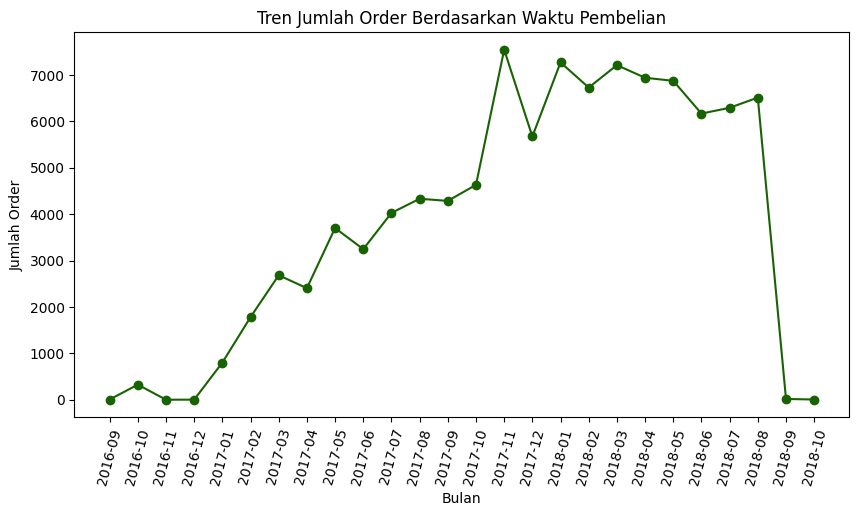

In [53]:
plt.figure(figsize=(10, 5))
plt.plot(montly_orders.index, montly_orders['order_id'], marker='o', linestyle='-', color='#186301')
plt.title('Tren Jumlah Order Berdasarkan Waktu Pembelian')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Order')
plt.xticks(rotation=75)
plt.show

**Insight:**

Tren jumlah order dalam beberapa bulan terakhir menunjukkan kecenderungan yang naik secara signifikan, namun di akhir periode terlihat penurunan yang drastis. Peningkatan jumlah order tertinggi terjadi pada bulan November 2017, yang juga tercatat sebagai bulan dengan total penjualan tertinggi sepanjang periode tersebut. Namun, penurunan terbesar terjadi pada bulan September 2018, di mana jumlah order mengalami penurunan signifikan dibandingkan dengan bulan-bulan sebelumnya.

### Pertanyaan 2: Bagaimana distribusi skor ulasan pelanggan, dan berapa persentase ulasan positif (skor 4-5) dibandingkan total ulasan?

In [47]:
review_score_counts = order_reviews_df.groupby('review_score').agg({
    'review_id': 'count'
}).sort_values(by='review_score', ascending=False)
review_score_counts

,review_id
review_score,
5,57328
4,19142
3,8179
2,3151
1,11424


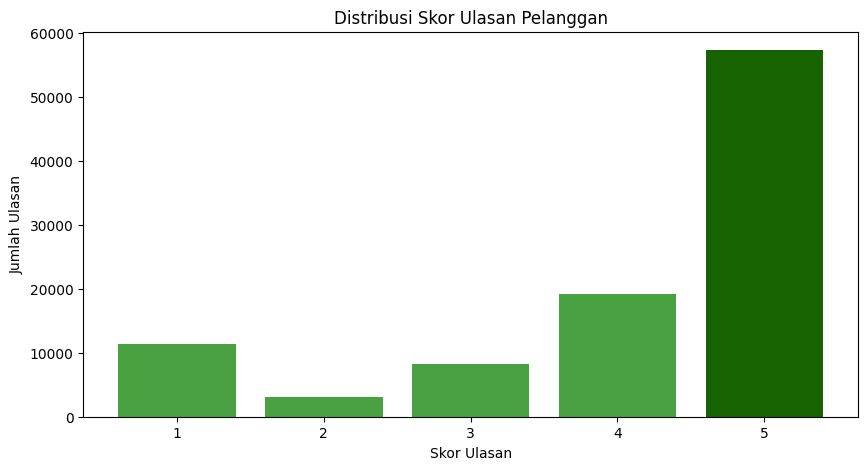

In [58]:
plt.figure(figsize=(10, 5))
plt.bar(review_score_counts.index, review_score_counts['review_id'], color=['#186301', '#49a141', '#49a141', '#49a141', '#49a141'])
plt.title('Distribusi Skor Ulasan Pelanggan')
plt.xlabel('Skor Ulasan')
plt.ylabel('Jumlah Ulasan')
plt.show()

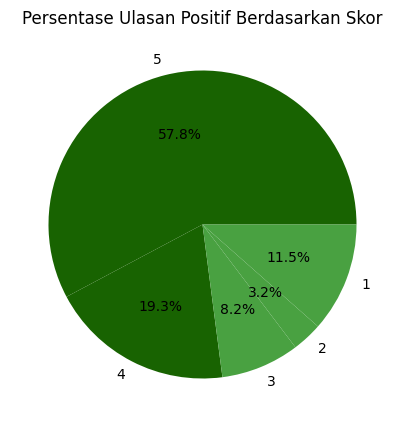

In [60]:
plt.figure(figsize=(10, 5))
colors = ['#186301', '#49a141', '#49a141', '#49a141', '#49a141']
plt.pie(review_score_counts['review_id'], labels=review_score_counts.index, autopct='%1.1f%%', colors=['#186301', '#186301', '#49a141', '#49a141', '#49a141'])
plt.title('Persentase Ulasan Positif Berdasarkan Skor')
plt.show()

**Insight:**

Distribusi skor ulasan pelanggan menunjukkan bahwa skor tertinggi adalah 5, diikuti oleh skor 4, dan terakhir skor 1. Skor 5 mendominasi dengan persentase 57,8%, sementara skor 4 memiliki persentase sebesar 19,3%. Artinya, 77,1% dari total ulasan pelanggan dapat dianggap positif, mengindikasikan bahwa mayoritas pelanggan merasa puas dengan produk atau layanan tersebut.

## Analisis Lanjutan (Opsional):  Bagaimana segmentasi pelanggan berdasarkan metode pembayaran yang digunakan?

In [50]:
payment_type_counts = order_payments_df.groupby('payment_type').agg({
    'order_id': 'count'
}).sort_values(by='order_id', ascending=False)
payment_type_counts

,order_id
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


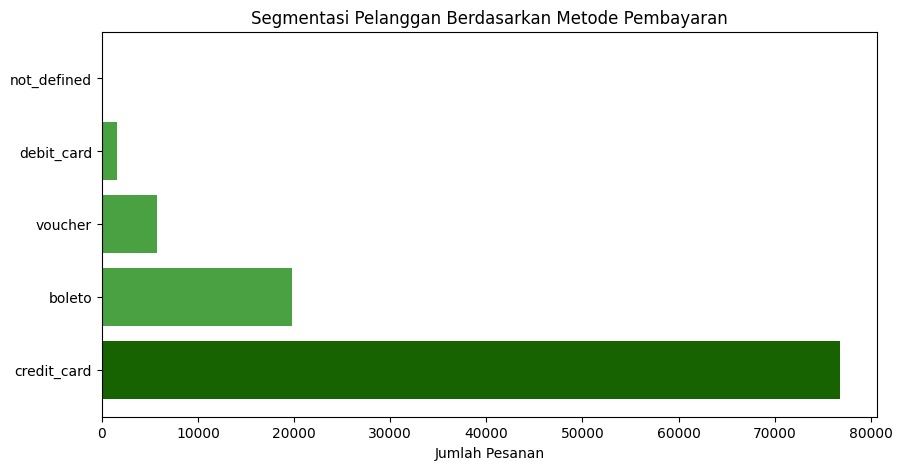

In [51]:
plt.figure(figsize=(10, 5))
plt.barh(payment_type_counts.index, payment_type_counts['order_id'], color=colors)
plt.title('Segmentasi Pelanggan Berdasarkan Metode Pembayaran')
plt.xlabel('Jumlah Pesanan')
plt.show()

**Insight:**

Berdasarkan segmentasi pelanggan berdasarkan metode pembayaran yang digunakan, metode pembayaran kartu kredit mendominasi dengan jumlah penggunaan tertinggi. Setelah itu, metode pembayaran boleto menempati posisi kedua, diikuti oleh voucher.

## Conclusion

- Conclution pertanyaan 1
  - Bagaimana tren jumlah order dalam beberapa bulan terakhir berdasarkan waktu pembelian?
  - Tren jumlah order dalam beberapa bulan terakhir menunjukkan kecenderungan yang naik secara signifikan, namun di akhir periode terlihat penurunan yang drastis. Peningkatan jumlah order tertinggi terjadi pada bulan November 2017, yang juga tercatat sebagai bulan dengan total penjualan tertinggi sepanjang periode tersebut. Namun, penurunan terbesar terjadi pada bulan September 2018, di mana jumlah order mengalami penurunan signifikan dibandingkan dengan bulan-bulan sebelumnya.
- Conclution pertanyaan 2
  - Bagaimana distribusi skor ulasan pelanggan, dan berapa persentase ulasan positif (skor 4-5) dibandingkan total ulasan?
  - Mayoritas pelanggan memberikan skor ulasan yang sangat positif, dengan skor 5 mendominasi sebesar 57,8%, diikuti oleh skor 4 sebesar 19,3%. Jika digabungkan, ulasan positif (skor 4 dan 5) mencapai 77,1% dari total ulasan, menunjukkan bahwa mayoritas pelanggan puas terhadap produk atau layanan yang ditawarkan.
- Conclution analisis lanjutan
  - Bagaimana segmentasi pelanggan berdasarkan metode pembayaran yang digunakan?
  - Metode pembayaran yang paling banyak digunakan oleh pelanggan adalah kartu kredit, menunjukkan preferensi utama untuk kenyamanan dan fleksibilitas transaksi. Posisi kedua ditempati oleh boleto, yang tetap menjadi alternatif populer bagi sebagian pelanggan, sementara voucher digunakan oleh segmen yang lebih kecil, kemungkinan terkait dengan program promosi atau insentif tambahan. Segmentasi ini mencerminkan beragamnya kebutuhan dan preferensi pelanggan dalam bertransaksi.

In [52]:
merged_df = pd.merge(orders_df, order_reviews_df, on='order_id', how='left')
all_df = pd.merge(merged_df, order_payments_df, on='order_id', how='left')

all_df.to_csv("all_data.csv", index=False)